In [54]:
import pandas as pd #load and manipulate data and for one-hot encoding
import numpy as np # calculate the mean and standard deviation
from sklearn.model_selection import train_test_split #split data into training and testing
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn. metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/competition
!ls

/content/gdrive/My Drive/competition
'경진대회용 사출성형기 데이터셋_labeled.csv'   Untitled0.ipynb


In [21]:
#데이터 다운로드
df = pd.read_csv('labeled.csv') 
df.shape

In [108]:
df1 = pd.read_csv('labeled.csv') 

In [109]:
df1['TimeStamp']=pd.to_datetime(df1['TimeStamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')
df1['PART_FACT_PLAN_DATE']=pd.to_datetime(df1['PART_FACT_PLAN_DATE'],format='%Y-%m-%d 오전 12:00:00',errors='coerce')

In [110]:
df1.head(2)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.5,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,0.0,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
df1[df1['TimeStamp'].isnull()]

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12


In [112]:
df1[df1['PART_FACT_PLAN_DATE'].isnull()]

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12


In [113]:
df1.groupby('PassOrFail').count()

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
PassOrFail,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
Y,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925,7925


In [117]:
ndf = df1.loc[df['Reason'] != 'None']
pdf = df1.loc[df['Reason'] == 'None']
print("정상 갯수:{}, 불량 갯수: {}".format(pdf.shape[0],ndf.shape[0]))

정상 갯수:7925, 불량 갯수: 71


In [115]:
df1['PassOrFail'] = df1['PassOrFail'].map({'N':int(0), 'Y':int(1)})

In [116]:
df1.head(3)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,None,9.59,4.47,16.92,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.5,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,0.0,24.799999,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,1,None,9.60,4.48,16.91,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.5,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
ndf.groupby('Reason')['PassOrFail'].count()

Reason
가스        35
미성형       16
초기허용불량    20
Name: PassOrFail, dtype: int64

In [121]:
df1.groupby('PART_FACT_SERIAL')['Injection_Time','Filling_Time','Plasticizing_Time','Cycle_Time','Clamp_Close_Time'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time
PART_FACT_SERIAL,,,,,
2,16.309999,3.000000,10.920000,66.860001,5.160000
3,1.070000,0.940000,12.960000,61.779999,6.790000
4,1.070000,0.940000,12.960000,61.779999,6.790000
6,9.588035,4.472030,16.590691,59.534299,7.111706
7,9.578846,4.468220,16.586753,59.536657,7.111359
9,7.975222,3.788170,16.103723,59.963841,7.058125
10,7.979972,3.785904,16.110660,59.974253,7.055842
11,1.084484,0.963135,12.959960,61.772698,6.796072
12,1.060200,0.938920,12.894680,61.769439,6.796920


In [137]:
df1

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,None,9.59,4.47,16.920000,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.500000,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,0.0,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,None,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,1,None,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16,23,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,1,None,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,None,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,5fa112859c0189cc66dabe34,2020-11-03 08:17:36,2020-11-03,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,1,None,9.60,4.48,16.620001,59.560001,7.11,653.429993,0.0,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,0.0,66.099998,0.0,0.0,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7992,5fa112869c0189cc66dabe42,2020-11-03 08:18:37,2020-11-03,7,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,None,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,0.0,66.099998,0.0,0.0,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7993,5fa112879c0189cc66dabe50,2020-11-03 08:18:37,2020-11-03,6,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,1,None,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230

In [163]:
elems = df1[['Injection_Time','Filling_Time','Plasticizing_Time']]

# PCA 라이브러리 가져오기
from sklearn import decomposition

 #줄이고 싶은 차원 수 지정
pca = decomposition.PCA(n_components=1) 

# X에 오리지널 데이터 넣기
sklearn_pca_x = pca.fit_transform(elems) 

# 결과를 테이블로 만들기
df1["pca"] = sklearn_pca_x



In [159]:
sklearn_pca_x

array([[-1.62579111],
       [-1.633911  ],
       [-1.633911  ],
       ...,
       [-1.53258261],
       [-1.52478795],
       [-1.52478795]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


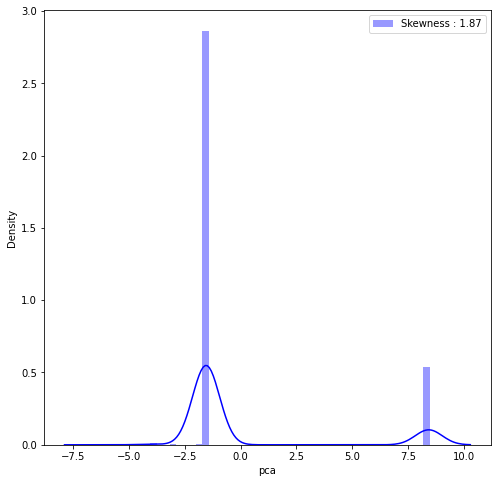

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df1['pca'], color='b', label='Skewness : {:.2f}'.format(df1['pca'].skew()), ax=ax)
g = g.legend(loc='best')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df1['Injection_Time'], color='b', label='Skewness : {:.2f}'.format(df1['Injection_Time'].skew()), ax=ax)
g = g.legend(loc='best')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df1['Filling_Time'], color='b', label='Skewness : {:.2f}'.format(df1['Filling_Time'].skew()), ax=ax)
g = g.legend(loc='best')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df1['Plasticizing_Time'], color='b', label='Skewness : {:.2f}'.format(df1['Plasticizing_Time'].skew()), ax=ax)
g = g.legend(loc='best')

In [171]:
df2 = df1 #check point 1

In [173]:
df2.drop(['Mold_Temperature_12','Mold_Temperature_11','Mold_Temperature_10','Mold_Temperature_9','Mold_Temperature_8','Mold_Temperature_7','Mold_Temperature_6','Mold_Temperature_5','Mold_Temperature_1'], axis=1,inplace = True)

In [174]:
df2.head(1)

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,pca
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16,24,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,1,None,9.59,4.47,16.92,59.52,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.5,141.800003,136.800003,37.400002,59.299999,276.5,274.700012,274.799988,269.200012,255.0,229.699997,0.0,66.300003,0.0,24.799999,27.5,-1.625791


In [179]:
df2.shape

(7996, 31)

In [178]:
df2.drop(['_id','PART_FACT_PLAN_DATE','PART_NAME','EQUIP_NAME','TimeStamp','EQUIP_CD'], axis=1,inplace = True)

In [180]:
df2.head(1)

,PART_FACT_SERIAL,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,pca
0,24,1,None,9.59,4.47,16.92,59.52,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.5,141.800003,136.800003,37.400002,59.299999,276.5,274.700012,274.799988,269.200012,255.0,229.699997,0.0,66.300003,0.0,24.799999,27.5,-1.625791


In [181]:
X=df2.drop(['PassOrFail','Reason'], axis=1)

In [182]:
Y=df2['PassOrFail']

In [183]:
Y2=df2['Reason']

In [184]:
X

,PART_FACT_SERIAL,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,pca
0,24,9.59,4.47,16.920000,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.500000,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,24.799999,27.500000,-1.625791
1,24,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,24.799999,27.600000,-1.633911
2,23,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,24.799999,27.600000,-1.633911
3,23,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,25.000000,27.600000,-1.625392
4,24,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,25.000000,27.600000,-1.625392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,6,9.60,4.48,16.620001,59.560001,7.11,653.429993,0.0,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,0.0,66.099998,0.0,21.000000,22.400000,-1.520891
7992,7,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,0.0,66.099998,0.0,21.000000,22.400000,-1.532583
7993,6,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,0.0,66.099998,0.0,21.000000,22.400000,-1.532583
7994,6,9.60,4.48,16.629999,59.580002,7.11,653.429993,0.0,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,136.899994,38.400002,59.900002,276.100006,275.799988,275.000000,271.299988,255.100006,230.199997,0.0,65.199997,0.0,21.000000,22.299999,-1.524788


In [ ]:
Y

In [ ]:
Y2

In [23]:
df.drop(['_id','PART_NAME','EQUIP_NAME','TimeStamp','EQUIP_CD'], axis=1,inplace = True)

In [24]:
df.shape

(7996, 40)

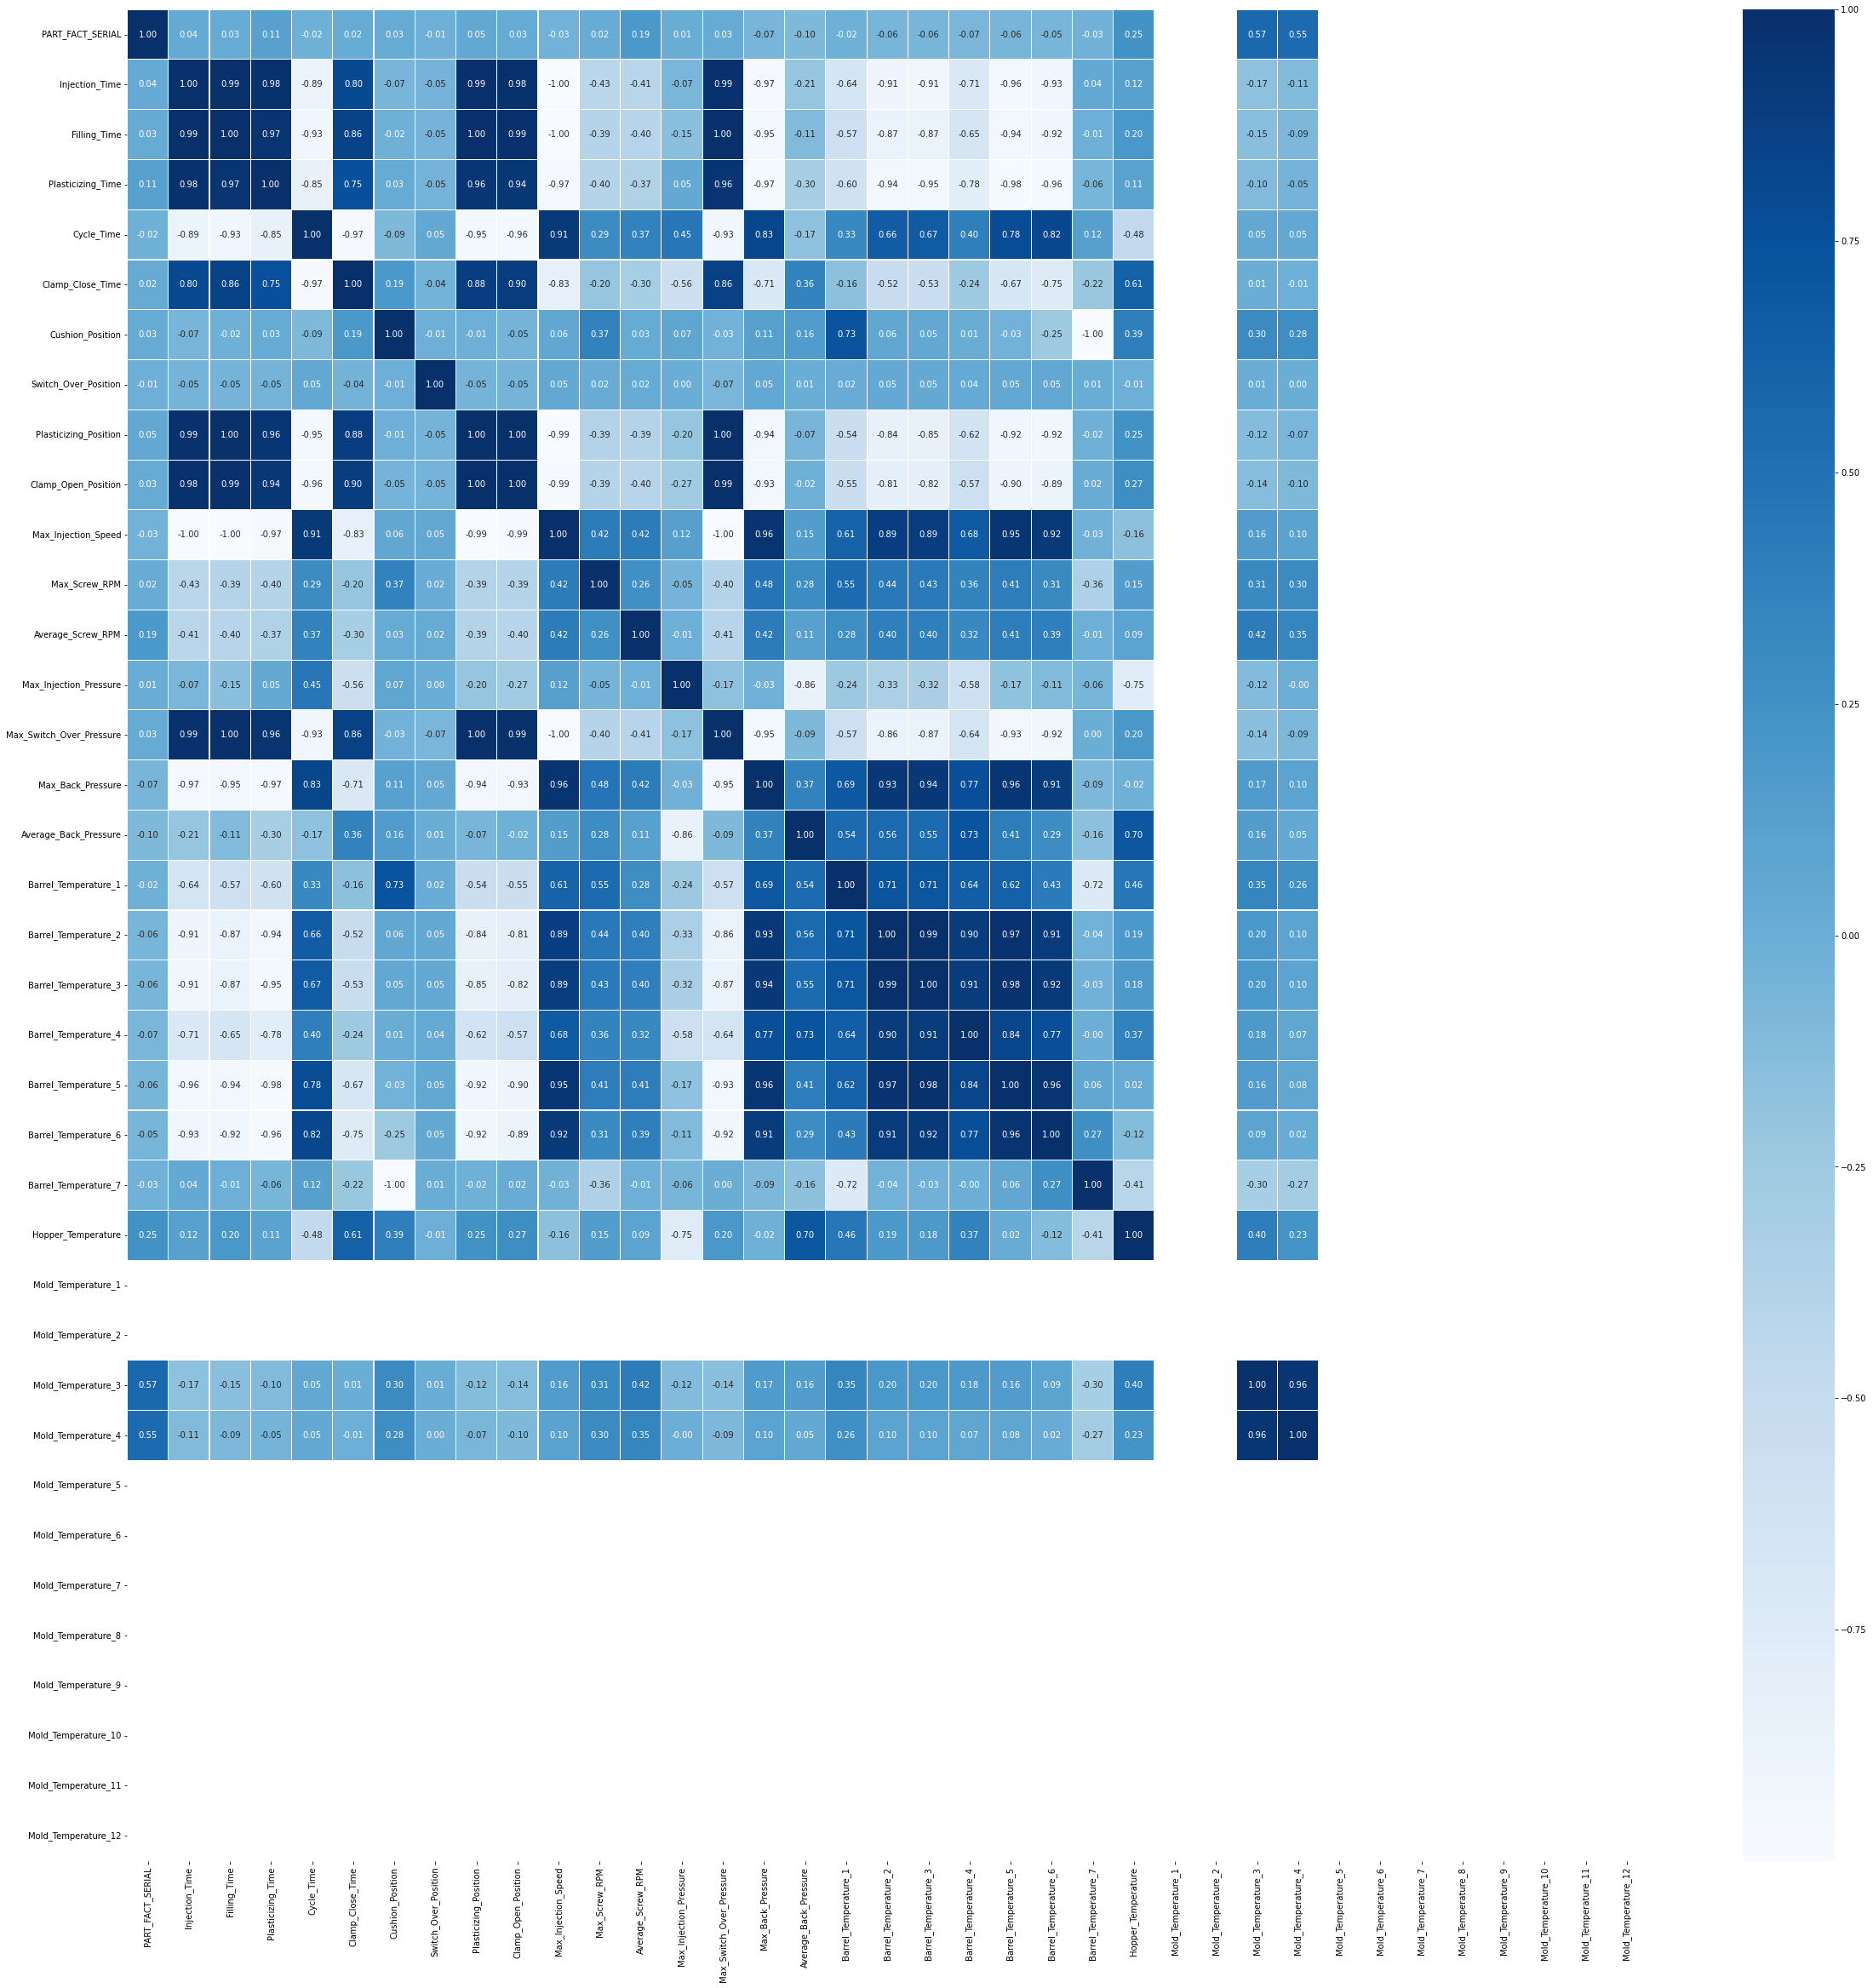

In [138]:
plt.subplots(figsize=(40,40))
sns.heatmap(data = df.corr(), linewidths=0.1,annot=True,fmt='.2f',cmap='Blues')

In [32]:
nedf = df.loc[df['Reason'] != 'None']
podf = df.loc[df['Reason'] == 'None']
print("정상 갯수:{}, 불량 갯수: {}".format(podf.shape[0],nedf.shape[0]))

정상 갯수:7925, 불량 갯수: 71


In [40]:
nedf.groupby('Reason')['PassOrFail'].count()

Reason
가스        35
미성형       16
초기허용불량    20
Name: PassOrFail, dtype: int64

In [ ]:
podf.groupby('PART_FACT_SERIAL')['Injection_Time','Filling_Time','Plasticizing_Time','Cycle_Time','Clamp_Close_Time'].mean()

In [ ]:
nedf.groupby(['Reason','PART_FACT_SERIAL'])['Injection_Time','Filling_Time','Plasticizing_Time','Cycle_Time','Clamp_Close_Time'].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


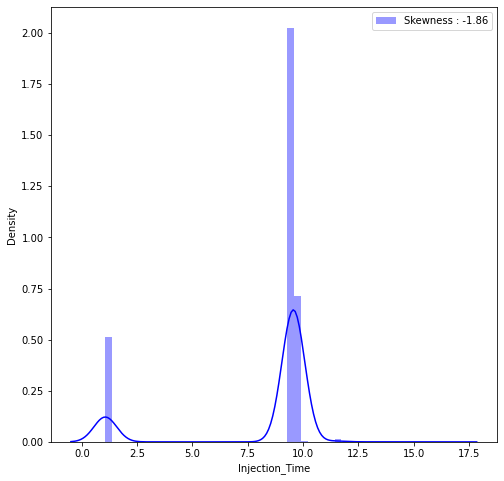

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df['Injection_Time'], color='b', label='Skewness : {:.2f}'.format(df['Injection_Time'].skew()), ax=ax)
g = g.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


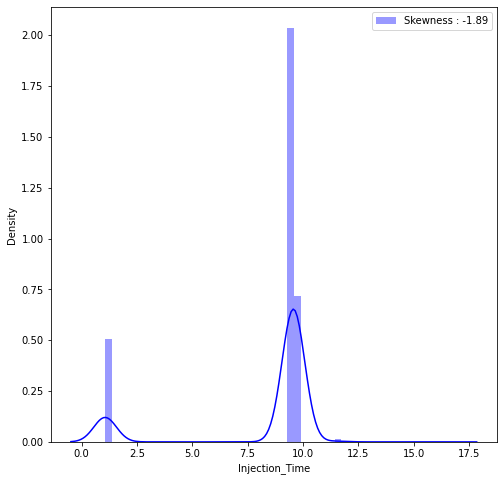

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(podf['Injection_Time'], color='b', label='Skewness : {:.2f}'.format(podf['Injection_Time'].skew()), ax=ax)
g = g.legend(loc='best')